Biblioteki

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import shutil
from tensorflow.keras.models import load_model
import matplotlib.patches as mpatches

model_name = "model-grahp_classification_v4_crossvalid_2.keras"
img_height, img_width = 180, 180
batch_size = 32
try:
    model = load_model(model_name)
    print("Model załadowany pomyślnie")
except Exception as e:
    print(f"Model nie jest załadowany: {e}")

Model załadowany pomyślnie


Ścieżki i wstępne ustawienia

In [2]:
data_dir = '../graphs_crossvalid'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
class_names = train_ds.class_names

Found 2200 files belonging to 5 classes.
Using 1760 files for training.


In [3]:
def get_image_filenames(folder):
    filenames = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            filenames.append(filename)
    return filenames

def get_image_filenames(directory):
    return [os.path.join(root, name)
            for root, dirs, files in os.walk(directory)
            for name in files
            if name.endswith((".png", ".jpg", ".jpeg"))]

def rgb_to_grayscale(images):
    return tf.image.rgb_to_grayscale(images)

test_photo_path = '../test_graphs'
test_photos = get_image_filenames(test_photo_path)
print(len(test_photos))

counter = 0
for test_photo in test_photos:
    # Wybór obrazka testowego
    image_path = test_photo

    # Wczytanie obrazu i dostosowanie go do odpowiedniego rozmiaru
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Przekształć obraz do skali szarości
    img_array = rgb_to_grayscale(img_array)
    # Rozszerz wymiary obrazu
    img_array = tf.expand_dims(img_array, 0)

    # Przewidywanie klasy obrazu
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    if class_names[np.argmax(score)] in test_photo:
        counter += 1

    print(
        "|- {} -| najprawdopodobniej należy do klasy |- {} -| z prawdopodobieństwem {:.2f} procent."
        .format(test_photo, class_names[np.argmax(score)], 100 * np.max(score))
    )

55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
|- ../test_graphs\drawn\cycle-1.png -| najprawdopodobniej należy do klasy |- full -| z prawdopodobieństwem 100.00 procent.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
|- ../test_graphs\drawn\cycle-2.png -| najprawdopodobniej należy do klasy |- empty -| z prawdopodobieństwem 99.27 procent.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
|- ../test_graphs\drawn\cycle-3.png -| najprawdopodobniej należy do klasy |- empty -| z prawdopodobieństwem 98.56 procent.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
|- ../test_graphs\drawn\cycle-4.png -| najprawdopodobniej należy do klasy |- empty -| z prawdopodobieństwem 100.00 procent.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
|- ../test_graphs\drawn\cycle-5.png -| najprawdopodobniej należy do klasy |- cycle -| z prawdopodobieństwem 57.37 procent.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
|- ../test_graphs\drawn\cycle-6.png -| najprawdopodobniej należy do klasy |- empty -| z prawdopodobieństwem 98.01 procent.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2

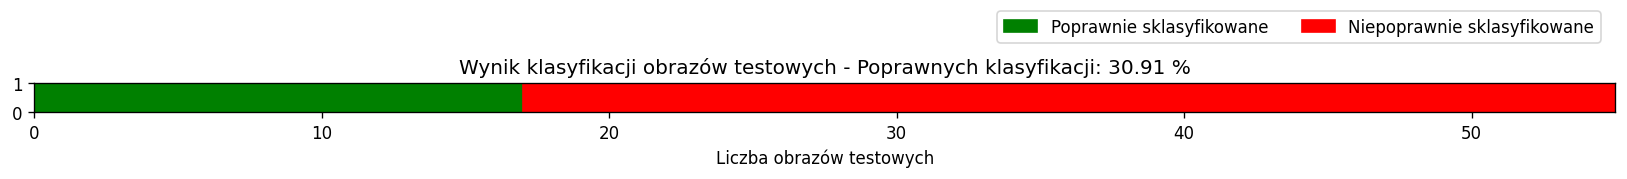

In [4]:
fig, ax = plt.subplots(dpi=120)
fig.set_size_inches(17, 10)
for i in range(len(test_photos)):
    color = 'green' if i < counter else 'red'
    rect = plt.Rectangle((i, 0), 1, 1, color=color)
    ax.add_patch(rect)

ax.set_xlim(0, len(test_photos))
ax.set_ylim(0, 1)
ax.set_aspect('equal')

ax.set_xlabel('Liczba obrazów testowych')
ax.set_title('Wynik klasyfikacji obrazów testowych')

perc_correct = round((counter / len(test_photos)) * 100, 2)
ax.set_title("Wynik klasyfikacji obrazów testowych - Poprawnych klasyfikacji: {} %".format(perc_correct))

green_patch = mpatches.Patch(color='green', label='Poprawnie sklasyfikowane')
red_patch = mpatches.Patch(color='red', label='Niepoprawnie sklasyfikowane')
plt.legend(handles=[green_patch, red_patch], loc='upper center', bbox_to_anchor=(0.8, 3.8), ncol=2)

plt.show()